In [1]:
#https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra
from yellowbrick.cluster.elbow import kelbow_visualizer
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer #elbow point 위한 라이브러리
import collections
import mglearn
import matplotlib.pyplot as plt
import random

import warnings
warnings.filterwarnings(action='ignore') 

random.seed(2020)

Quantitative Attributes:  
Age (years) : 연령(년)  
BMI (kg/m2) : BMI  
Glucose (mg/dL) : 포도당  
Insulin (µU/mL) : 인슐린  
HOMA : homeostatic model assessment(인슐린 저항성)  
Leptin (ng/mL) : 렙틴(체중 조절에 관여하는 호르몬)  
Adiponectin (µg/mL) :  지방 세포가 생성, 분비하는 호르몬. 지방질과 포도당의 대사를 조절한다. 
Resistin (ng/mL) : 레지스틴(식욕조절호르몬)  
MCP-1(pg/dL) : 암 전이의 잘 알려진 프로모터   

Labels:  
1=Healthy controls 건강한 사람  
2=Patients 환자  

In [2]:
# 데이터 로드
data = pd.read_csv('dataR2.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [3]:
data2 = data.drop(['Classification'], axis=1)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          116 non-null    int64  
 1   BMI          116 non-null    float64
 2   Glucose      116 non-null    int64  
 3   Insulin      116 non-null    float64
 4   HOMA         116 non-null    float64
 5   Leptin       116 non-null    float64
 6   Adiponectin  116 non-null    float64
 7   Resistin     116 non-null    float64
 8   MCP.1        116 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 8.3 KB


In [4]:
# 데이터 정규화
def standardization(Data):
    Input = ((Data[['Age', 'BMI','Glucose','Insulin', 'HOMA', 'Leptin', 
                    'Adiponectin', 'Resistin', 'MCP.1']] -
              np.mean(Data[['Age', 'BMI','Glucose','Insulin', 'HOMA', 'Leptin', 
                            'Adiponectin', 'Resistin', 'MCP.1']], axis=0)) / 
                   np.std(Data[['Age', 'BMI','Glucose','Insulin', 'HOMA', 'Leptin',
                                'Adiponectin', 'Resistin', 'MCP.1']], axis=0))
    return Input

In [5]:
standard_data = standardization(data2)
standard_data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,-0.579794,-0.816675,-1.239222,-0.728739,-0.614282,-0.932334,-0.070222,-0.545517,-0.341251
1,1.601821,-1.378751,-0.258299,-0.688038,-0.548240,-0.930413,-0.697350,-0.864214,-0.191224
2,1.539489,-0.891764,-0.302887,-0.550073,-0.464752,-0.454219,1.797998,-0.441660,0.058214
3,0.666843,-1.243303,-0.927110,-0.676965,-0.574210,-0.876021,-0.441945,-0.158867,1.142718
4,1.788816,-1.294601,-0.258299,-0.644743,-0.521081,-1.042682,-0.786881,-0.336352,0.694716


In [6]:
pca = PCA(n_components=2)
result = pca.fit_transform(standard_data)

result = pd.DataFrame(result, columns=["x", "y"])

In [7]:
result

,x,y
0,-1.992785,0.125612
1,-1.328830,0.247930
2,-1.217244,0.992393
3,-1.199203,-0.272409
4,-0.898467,-0.143089
...,...,...
111,-0.651096,-0.334463
112,-1.267058,0.971953
113,-0.064035,-0.098318
114,-1.898629,1.562120


In [8]:
# KMeans(n_clusters=i, init=Init_Method, random_state=2020, n_init=Num_Init)
Kmeans_model = KMeans(n_clusters = 2, init='k-means++', random_state = 2022, 
                      n_init=1)
Kmeans_model.fit(standard_data)

KMeans(n_clusters=2, n_init=1, random_state=2022)

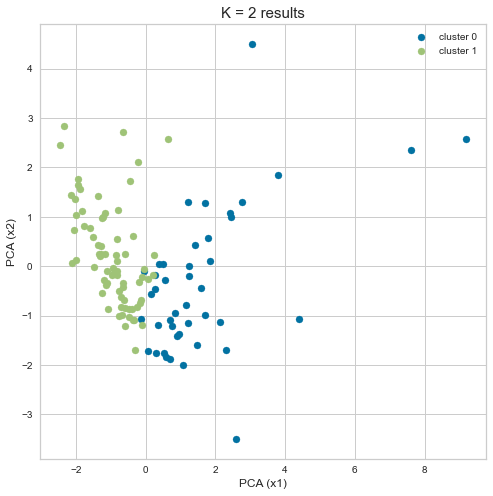

In [9]:
result_kmeans2 = result
result_kmeans2['cluster'] = Kmeans_model.fit_predict(standard_data)
result_kmeans2

plt.figure(figsize = (8, 8))
k=2
for i in range(k):
    plt.scatter(result_kmeans2.loc[result_kmeans2['cluster'] == i, 'x'],
                result_kmeans2.loc[result_kmeans2['cluster'] == i, 'y'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('PCA (x1)', size = 12)
plt.ylabel('PCA (x2)', size = 12)
plt.show()

In [10]:
# 산점도 가시화
def Simple_Scatter(data, Name):
    G = sns.jointplot(x = data.columns[0], y = data.columns[1], data = data,
                      kind='scatter', hue = data.columns[2])
    G.fig.suptitle("Data : " + str(Name), fontsize = 10, color = 'black', 
                   alpha = 0.9)

# K-Means 클러스터링 함수 실행 후 차트 가시화
def k_Means_Plot(Data, Select_k, Init_Method = 'k-means++', Num_Init=30):
    fig, axes = plt.subplots((max(list(Select_k)))//6 + 1, 4, figsize=(20, 8)) 
    for i in Select_k: 
        row = ((i-2) // 4)
        col = ((i-2) % 4)
        Kmeans_Clustering = KMeans(n_clusters=i, init=Init_Method, 
                                   random_state=2020, n_init=Num_Init)
        Kmeans_Clustering.fit(Data) 
        mglearn.discrete_scatter(Data[Data.columns[0]], Data[Data.columns[1]], 
                                 Kmeans_Clustering.labels_, ax=axes[row, col], s=7) 
        mglearn.discrete_scatter(Kmeans_Clustering.cluster_centers_[:, 0], 
                                 Kmeans_Clustering.cluster_centers_[:, 1],
                                 list(range(i)), 
                                 markeredgewidth=3, 
                                 ax=axes[row, col], s=10)
        Score = np.round(silhouette_score(Data, Kmeans_Clustering.labels_),3)
        axes[row, col].set_title( 'k = ' + str(i)+' / S_Score:'+str(Score))

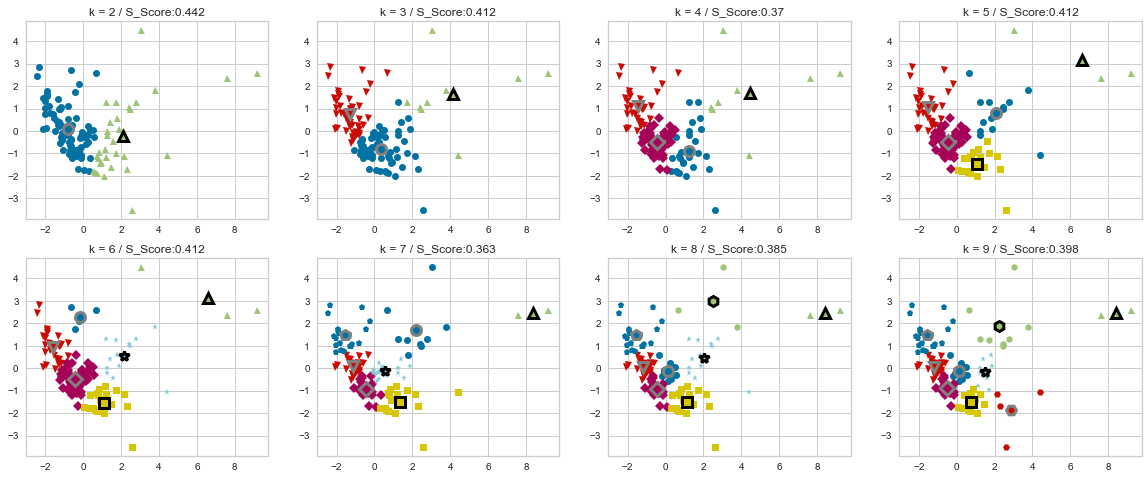

In [11]:
k_Means_Plot(Data = result.iloc[:, :2],
                 Select_k = range(2, 10),
                 Init_Method='random',Num_Init=1)

In [12]:
def elbow_method(X, max_range_for_elbow, rseed = 2022):
    return kelbow_visualizer(KMeans(random_state=rseed, init='k-means++', 
                                    n_init=50), X, k=(1, max_range_for_elbow)) 

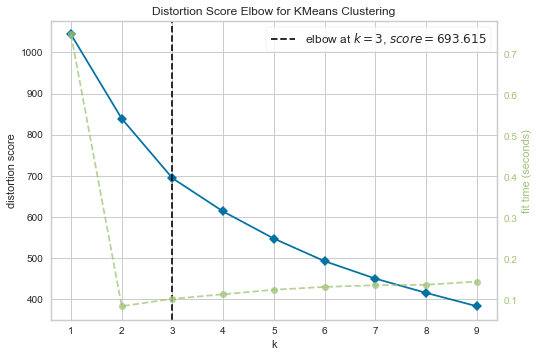

In [13]:
elbow = elbow_method(standard_data,10)
# 파란색이 각 데이터들의 군집 중심과의 평균 거리
# 초록색은 학습 시간을 나타냄

In [14]:
def drawSSEPlot(df, column_indices, n_clusters=8, max_iter=300, tol=1e-04, 
                init='k-means++', n_init=30, algorithm='auto'):
    inertia_values = []
    for i in range(1, n_clusters+1):
        km = KMeans(n_clusters=i, max_iter=max_iter, tol=tol, init=init, 
                    n_init=n_init, random_state=1, algorithm=algorithm)
        km.fit_predict(df.iloc[:, column_indices])
        inertia_values.append(km.inertia_)
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(range(1, n_clusters+1), inertia_values, color='red')
    plt.xlabel('No. of Clusters', fontsize=15)
    plt.ylabel('SSE / Inertia', fontsize=15)
    plt.title('SSE / Inertia vs No. Of Clusters', fontsize=15)
    plt.grid()
    plt.show()

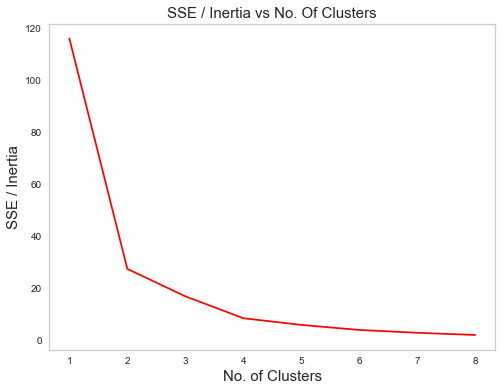

In [15]:
df = standard_data
drawSSEPlot(df, [0])

In [16]:
def visualize_silhouette_layer(data, param_init='k-means++', param_n_init=30, 
                               param_max_iter=300):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        clusterer = KMeans(n_clusters=i, init=param_init, n_init=param_n_init,
                           max_iter=param_max_iter, random_state=2022)
        cluster_labels = clusterer.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm._rocket_lut)
    plt.tight_layout()
    plt.show()

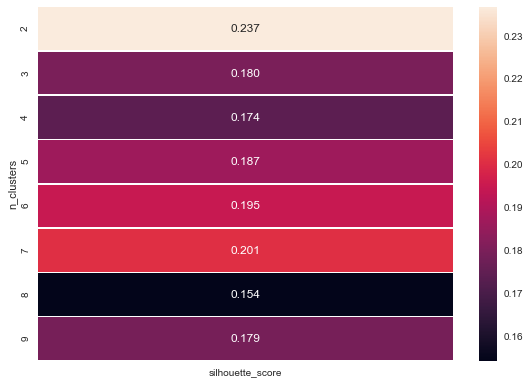

In [17]:
visualize_silhouette_layer(standard_data)

In [18]:
# KMeans(n_clusters=i, init=Init_Method, random_state=2020, n_init=Num_Init)
Kmeans_model_3 = KMeans(n_clusters = 3, init='k-means++', random_state = 2022, 
                      n_init=1)
Kmeans_model_3.fit(standard_data)

KMeans(n_clusters=3, n_init=1, random_state=2022)

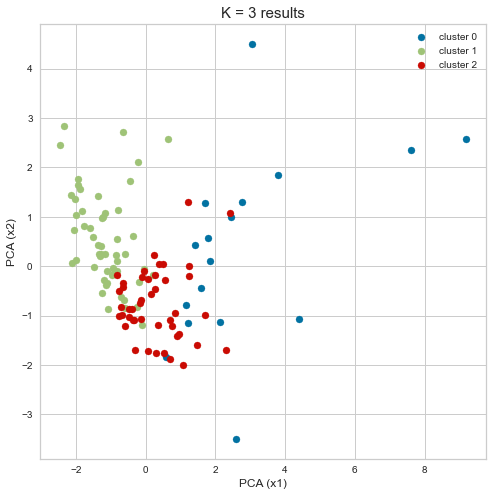

In [19]:
result_kmeans3 = result
result_kmeans3['cluster'] = Kmeans_model_3.fit_predict(standard_data)
result_kmeans3

plt.figure(figsize = (8, 8))
k=3
for i in range(k):
    plt.scatter(result_kmeans3.loc[result_kmeans3['cluster'] == i, 'x'],
                result_kmeans3.loc[result_kmeans3['cluster'] == i, 'y'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('PCA (x1)', size = 12)
plt.ylabel('PCA (x2)', size = 12)
plt.show()

In [20]:
standard_data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,-0.579794,-0.816675,-1.239222,-0.728739,-0.614282,-0.932334,-0.070222,-0.545517,-0.341251
1,1.601821,-1.378751,-0.258299,-0.688038,-0.548240,-0.930413,-0.697350,-0.864214,-0.191224
2,1.539489,-0.891764,-0.302887,-0.550073,-0.464752,-0.454219,1.797998,-0.441660,0.058214
3,0.666843,-1.243303,-0.927110,-0.676965,-0.574210,-0.876021,-0.441945,-0.158867,1.142718
4,1.788816,-1.294601,-0.258299,-0.644743,-0.521081,-1.042682,-0.786881,-0.336352,0.694716
...,...,...,...,...,...,...,...,...,...
111,-0.766789,-0.146468,-0.258299,-0.666590,-0.534786,1.469335,0.281654,-0.305255,-0.773527
112,0.292852,-0.148468,0.098400,-0.546881,-0.435039,-0.741611,1.649470,-0.600299,-0.593717
113,0.479848,0.893855,-0.035362,-0.427172,-0.365106,1.825348,1.813843,-0.356320,-0.640491
114,0.916171,-0.398546,-0.704173,-0.717467,-0.585883,-0.086651,3.459038,-0.928577,-0.412832


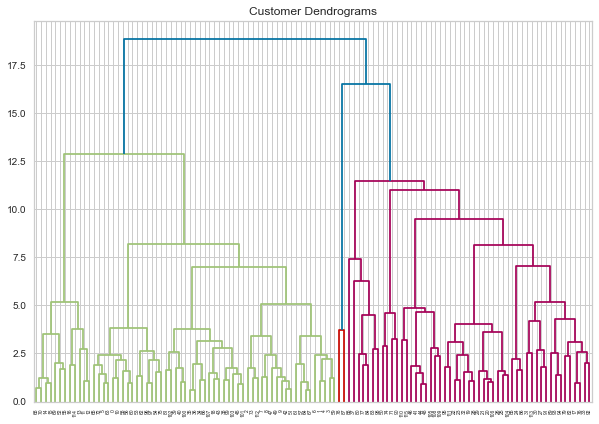

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendrograms")
dend = shc.dendrogram(shc.linkage(standard_data, method='ward'))

In [22]:
from sklearn.cluster import AgglomerativeClustering

hierarchy_clustering = AgglomerativeClustering(n_clusters=2, affinity='euclidean', 
                                  linkage='ward')
result_hierarchy = result
result_hierarchy['cluster'] = hierarchy_clustering.fit_predict(standard_data)
result_hierarchy

,x,y,cluster
0,-1.992785,0.125612,1
1,-1.328830,0.247930,1
2,-1.217244,0.992393,1
3,-1.199203,-0.272409,1
4,-0.898467,-0.143089,1
...,...,...,...
111,-0.651096,-0.334463,0
112,-1.267058,0.971953,1
113,-0.064035,-0.098318,0
114,-1.898629,1.562120,1


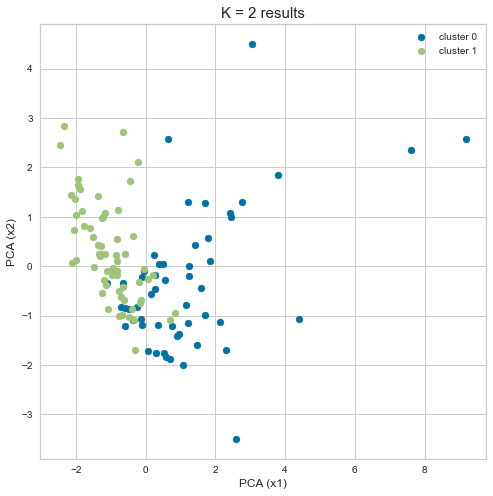

In [23]:
plt.figure(figsize = (8, 8))
k=2
for i in range(k):
    plt.scatter(result_hierarchy.loc[result_hierarchy['cluster'] == i, 'x'],
                result_hierarchy.loc[result_hierarchy['cluster'] == i, 'y'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('PCA (x1)', size = 12)
plt.ylabel('PCA (x2)', size = 12)
plt.show()

In [24]:
#  클러스터링 함수 실행 후 차트 가시화
def hierarchy_Plot(Data, Select_k, affinity='euclidean', linkage='ward'):
    fig, axes = plt.subplots((np.max(list(Select_k)))//6 + 1, 4, figsize=(20, 8)) 
    for i in Select_k: 
        row = ((i-2) // 4)
        col = ((i-2) % 4)
        hierarchy_clustering = AgglomerativeClustering(n_clusters=i, 
                                                       affinity='euclidean', 
                                                       linkage='ward')
        hierarchy_clustering.fit(Data) 
        mglearn.discrete_scatter(Data[Data.columns[0]], Data[Data.columns[1]], 
                                 hierarchy_clustering.labels_, ax=axes[row, col], 
                                 s=7) 
        Score = np.round(silhouette_score(Data, hierarchy_clustering.labels_),3)
        axes[row, col].set_title( 'k = ' + str(i)+' / S_Score:'+str(Score))

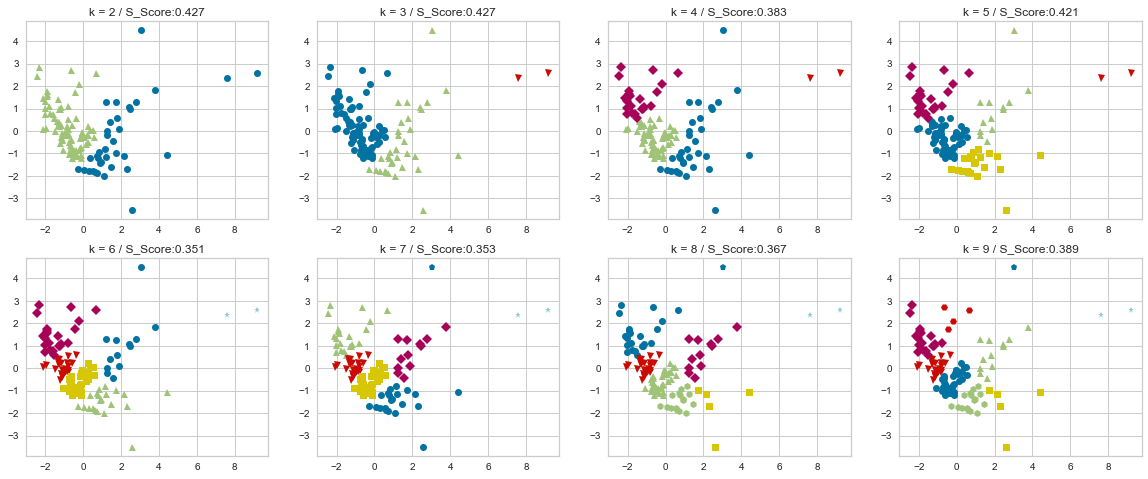

In [25]:
hierarchy_Plot(Data = result_hierarchy.iloc[:, :2],
                 Select_k = range(2, 10))

In [26]:
hierarchy_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', 
                                  linkage='ward')
result_hierarchy = result
result_hierarchy['cluster'] = hierarchy_clustering.fit_predict(standard_data)
result_hierarchy

,x,y,cluster
0,-1.992785,0.125612,0
1,-1.328830,0.247930,0
2,-1.217244,0.992393,0
3,-1.199203,-0.272409,0
4,-0.898467,-0.143089,0
...,...,...,...
111,-0.651096,-0.334463,1
112,-1.267058,0.971953,0
113,-0.064035,-0.098318,1
114,-1.898629,1.562120,0


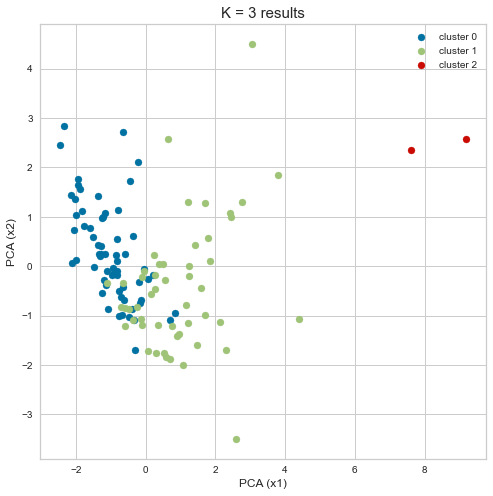

In [27]:
plt.figure(figsize = (8, 8))
k=3
for i in range(k):
    plt.scatter(result_hierarchy.loc[result_hierarchy['cluster'] == i, 'x'],
                result_hierarchy.loc[result_hierarchy['cluster'] == i, 'y'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('PCA (x1)', size = 12)
plt.ylabel('PCA (x2)', size = 12)
plt.show()

In [28]:
result

,x,y,cluster
0,-1.992785,0.125612,0
1,-1.328830,0.247930,0
2,-1.217244,0.992393,0
3,-1.199203,-0.272409,0
4,-0.898467,-0.143089,0
...,...,...,...
111,-0.651096,-0.334463,1
112,-1.267058,0.971953,0
113,-0.064035,-0.098318,1
114,-1.898629,1.562120,0


In [29]:
standard_data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,-0.579794,-0.816675,-1.239222,-0.728739,-0.614282,-0.932334,-0.070222,-0.545517,-0.341251
1,1.601821,-1.378751,-0.258299,-0.688038,-0.548240,-0.930413,-0.697350,-0.864214,-0.191224
2,1.539489,-0.891764,-0.302887,-0.550073,-0.464752,-0.454219,1.797998,-0.441660,0.058214
3,0.666843,-1.243303,-0.927110,-0.676965,-0.574210,-0.876021,-0.441945,-0.158867,1.142718
4,1.788816,-1.294601,-0.258299,-0.644743,-0.521081,-1.042682,-0.786881,-0.336352,0.694716
...,...,...,...,...,...,...,...,...,...
111,-0.766789,-0.146468,-0.258299,-0.666590,-0.534786,1.469335,0.281654,-0.305255,-0.773527
112,0.292852,-0.148468,0.098400,-0.546881,-0.435039,-0.741611,1.649470,-0.600299,-0.593717
113,0.479848,0.893855,-0.035362,-0.427172,-0.365106,1.825348,1.813843,-0.356320,-0.640491
114,0.916171,-0.398546,-0.704173,-0.717467,-0.585883,-0.086651,3.459038,-0.928577,-0.412832


In [30]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns

# create model and prediction
model_DESCAN = DBSCAN(eps=0.4,min_samples=5)
model_DESCAN.fit(standard_data)

DBSCAN(eps=0.4)

In [31]:
result_DESCAN = result
result_DESCAN['cluster'] = model_DESCAN.fit_predict(standard_data)
result_DESCAN

,x,y,cluster
0,-1.992785,0.125612,-1
1,-1.328830,0.247930,-1
2,-1.217244,0.992393,-1
3,-1.199203,-0.272409,-1
4,-0.898467,-0.143089,-1
...,...,...,...
111,-0.651096,-0.334463,-1
112,-1.267058,0.971953,-1
113,-0.064035,-0.098318,-1
114,-1.898629,1.562120,-1


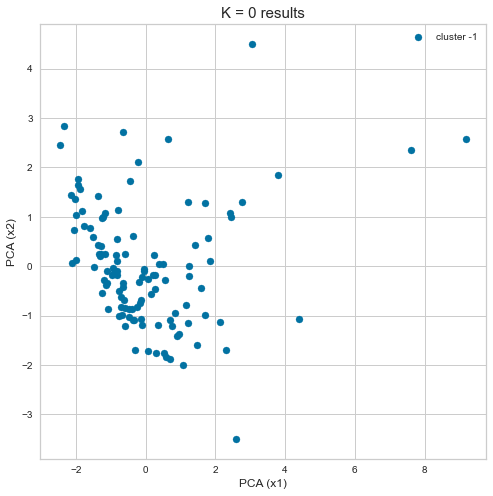

In [32]:
plt.figure(figsize = (8, 8))
k=result_DESCAN['cluster'].max() + 1
for i in range(-1, result_DESCAN['cluster'].max() + 1):
    plt.scatter(result_DESCAN.loc[result_DESCAN['cluster'] == i, 'x'],
                result_DESCAN.loc[result_DESCAN['cluster'] == i, 'y'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('PCA (x1)', size = 12)
plt.ylabel('PCA (x2)', size = 12)
plt.show()

In [48]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [50]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(standard_data)
distances, indices = nbrs.kneighbors(standard_data)

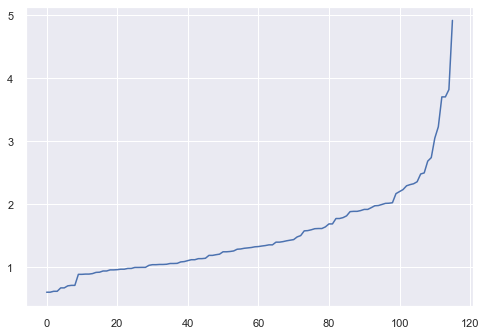

In [51]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
# 따라서 최적의 거리(eps)는 곡률의 변화가 최대인 지점으로 잡을 수 있다.
# 이는 eps = 2가 optimal value for epsilon이라고 볼 수 있다.

In [56]:
def DBSCAN_Plot(result_DESCAN, min_samples, eps):
    # create model and prediction
    model_DESCAN = DBSCAN(eps=eps,min_samples=min_samples)
    result_DESCAN = result
    result_DESCAN['cluster'] = model_DESCAN.fit_predict(standard_data)
    
    plt.figure(figsize = (8, 8))
    k=result_DESCAN['cluster'].max() + 1
    for i in range(-1, result_DESCAN['cluster'].max() + 1):
        plt.scatter(result_DESCAN.loc[result_DESCAN['cluster'] == i, 'x'],
                    result_DESCAN.loc[result_DESCAN['cluster'] == i, 'y'], 
                    label = 'cluster ' + str(i))

    plt.legend()
    plt.title('K = %d results'%k , size = 15)
    plt.xlabel('PCA (x1)', size = 12)
    plt.ylabel('PCA (x2)', size = 12)
    plt.show()

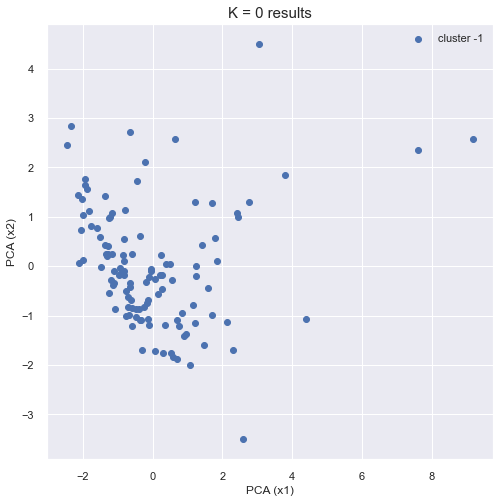

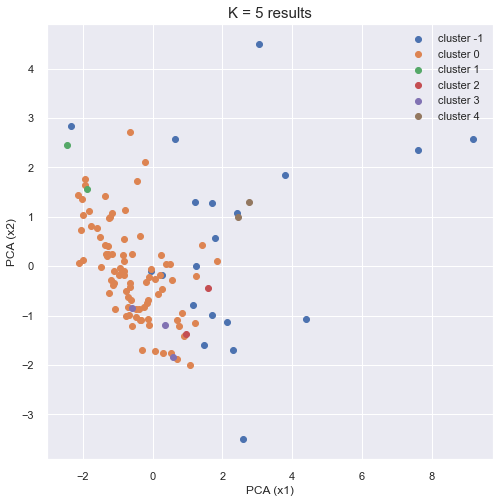

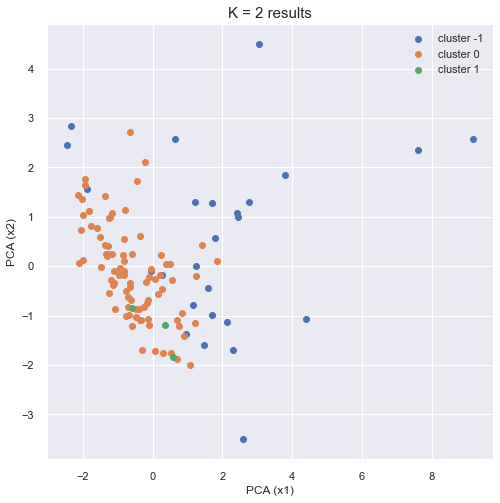

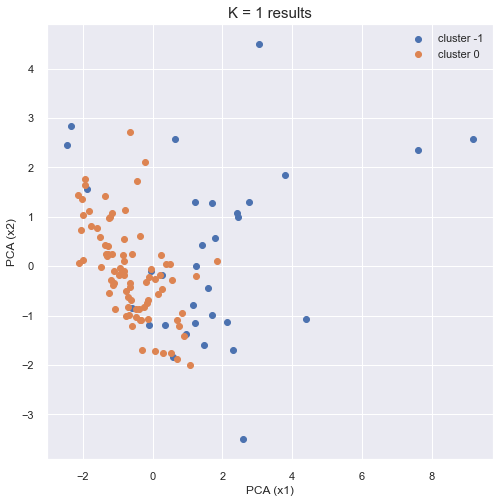

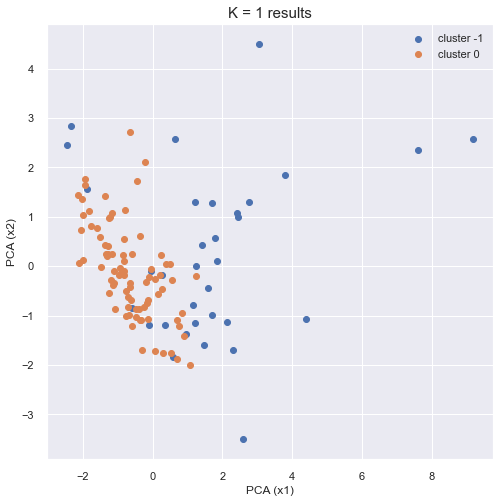

In [57]:
DBSCAN_Plot(result_DESCAN,min_samples=5,eps=0.5)
DBSCAN_Plot(result_DESCAN,min_samples=2,eps=2)
DBSCAN_Plot(result_DESCAN,min_samples=3,eps=2)
DBSCAN_Plot(result_DESCAN,min_samples=4,eps=2)
DBSCAN_Plot(result_DESCAN,min_samples=5,eps=2)

In [ ]:
# ------------------------------정답 label 공개 --------------------------

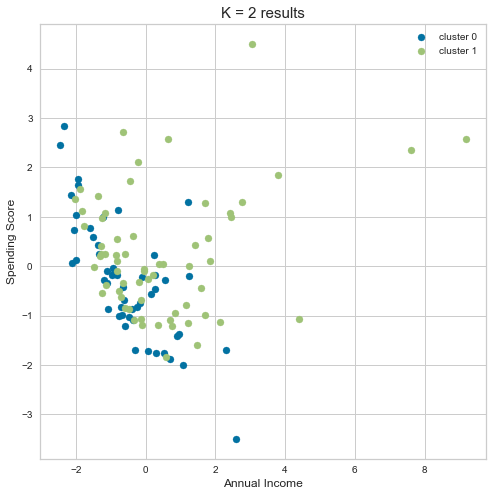

In [33]:
result_correct = result
result_correct['cluster'] = data['Classification'].values-1

plt.figure(figsize = (8, 8))
k=2
for i in range(k):
    plt.scatter(result_correct.loc[result_correct['cluster'] == i, 'x'],
                result_correct.loc[result_correct['cluster'] == i, 'y'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('Annual Income', size = 12)
plt.ylabel('Spending Score', size = 12)
plt.show()

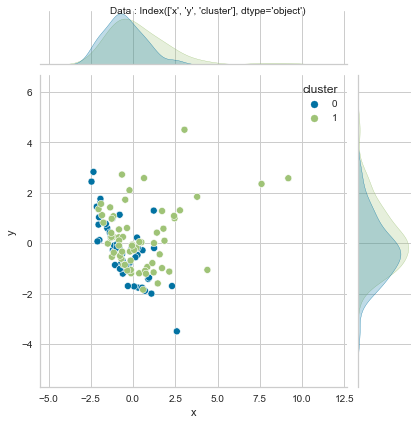

In [34]:
Simple_Scatter(result_correct.iloc[:, :3], result.columns)